        formula  target
0  Hg0.7Cd0.3Te    0.35
1          CuBr    3.08
2           LuP    1.30
3      Cu3SbSe4    0.40
4           ZnO    3.44


Processing Input Data: 100%|██████████| 3895/3895 [00:00<00:00, 16746.86it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 3895/3895 [00:00<00:00, 7210.51it/s]


	Creating Pandas Objects...
Linear Regression - RMSE: 0.671, R²: 0.709


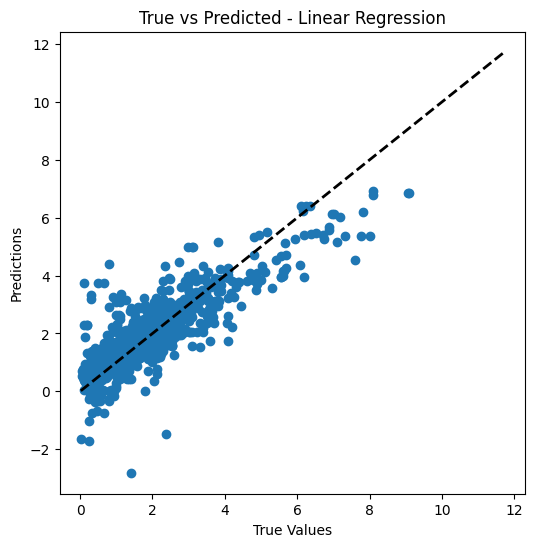

Ridge Regression - RMSE: 0.666, R²: 0.712


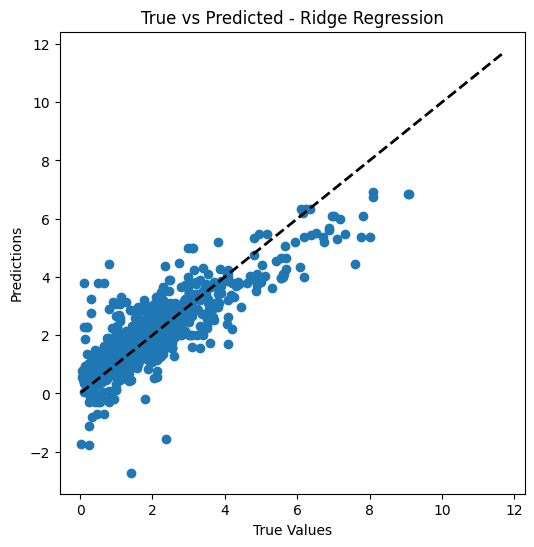

Random Forest - RMSE: 0.244, R²: 0.894


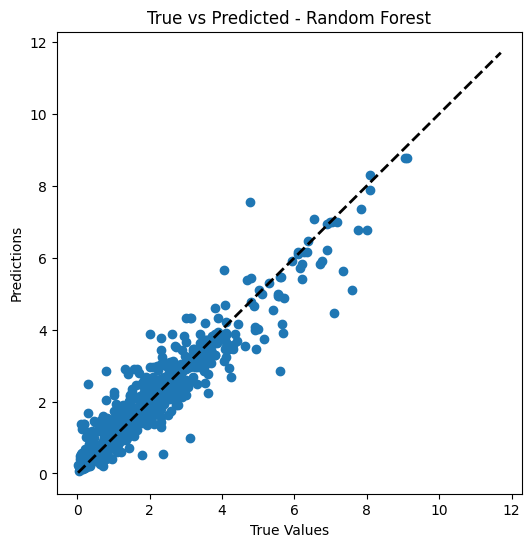

SVR - RMSE: 0.990, R²: 0.571


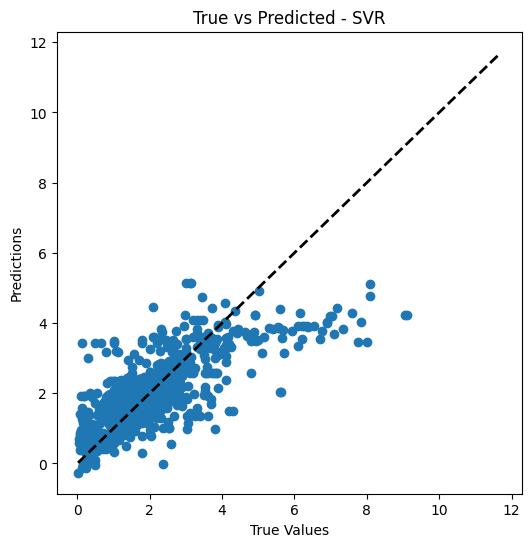

In [1]:
import pandas as pd
import numpy as np
from CBFV import composition

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# load data
df = pd.read_csv("Assign_regression_data.csv")
# clean missing values
df = df.dropna(subset=["Eg (eV)"])
#extract the composition and target columns for CBFV formula and target respectively
df1=df.copy()
df1=df1[["composition","Eg (eV)"]].rename(columns={"composition":"formula","Eg (eV)":"target"})
print(df1.head())
#generate features and targets
X, y, formulae, skipped = composition.generate_features(
    df1,
    elem_prop='magpie',
)
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42),
    # "XGBoost": XGBRegressor(n_estimators=200),
    "SVR": SVR(kernel='rbf', C=10.0, epsilon=0.1)
}
from sklearn.metrics import mean_squared_error, r2_score
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name} - RMSE: {rmse:.3f}, R²: {r2:.3f}")
    # visualize the results
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(f"True vs Predicted - {name}")
    plt.show()
# the results show that the Random Forest model performs the best with the lowest RMSE and highest R² score